#Mini Project 2
##Car Insurence
- by Aryan Raj
- 2022504700

# Task
Perform a complete ML pipeline for binary classification on the provided train.csv and test.csv datasets ("carInsurance_train.csv", "carInsurance_test.csv"). The pipeline should include data loading and inspection, preprocessing (handling missing values, feature engineering, encoding, scaling), exploratory data analysis, model training and evaluation (using multiple models, cross-validation, and hyperparameter tuning), model selection and explanation, and finally, prediction on the test set and saving the results in a specified format. The target variable is 'CarInsurance'.

## Load & inspect

### Subtask:
Load the training and testing datasets, inspect their structure, data types, and check for missing values and outliers.


**Reasoning**:
Load the training and testing datasets, display the first few rows, check data types, and count missing values.



In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('carInsurance_train.csv')
test_df = pd.read_csv('carInsurance_test.csv')

# Display the first few rows
print("Training DataFrame Head:")
display(train_df.head())
print("\nTesting DataFrame Head:")
display(test_df.head())

# Print data types
print("\nTraining DataFrame Info:")
train_df.info()
print("\nTesting DataFrame Info:")
test_df.info()

# Check for missing values
print("\nTraining DataFrame Missing Values:")
display(train_df.isnull().sum())
print("\nTesting DataFrame Missing Values:")
display(test_df.isnull().sum())

Training DataFrame Head:


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0



Testing DataFrame Head:


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN



Training DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   

,0
Id,0
Age,0
Job,19
Marital,0
Education,169
Default,0
Balance,0
HHInsurance,0
CarLoan,0
Communication,902



Testing DataFrame Missing Values:


,0
Id,0
Age,0
Job,5
Marital,0
Education,47
Default,0
Balance,0
HHInsurance,0
CarLoan,0
Communication,221


**Reasoning**:
Display descriptive statistics for numerical columns in both DataFrames to identify potential outliers.



In [ ]:
# Display descriptive statistics for numerical columns
print("\nTraining DataFrame Numerical Column Description:")
display(train_df.describe())
print("\nTesting DataFrame Numerical Column Description:")
display(test_df.describe())


Training DataFrame Numerical Column Description:


,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000



Testing DataFrame Numerical Column Description:


,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,0.0
mean,4500.500000,41.473000,0.013000,1398.298000,0.513000,0.12100,15.546000,2.50800,51.653000,0.806000,NaN
std,288.819436,12.051577,0.113331,2660.408024,0.500081,0.32629,8.370541,2.57732,109.024855,2.034331,NaN
min,4001.000000,18.000000,0.000000,-1980.000000,0.000000,0.00000,1.000000,1.00000,-1.000000,0.000000,NaN
25%,4250.750000,32.000000,0.000000,114.750000,0.000000,0.00000,8.000000,1.00000,-1.000000,0.000000,NaN
50%,4500.500000,39.000000,0.000000,517.500000,1.000000,0.00000,15.000000,2.00000,-1.000000,0.000000,NaN
75%,4750.250000,49.250000,0.000000,1609.750000,1.000000,0.00000,21.000000,3.00000,-1.000000,0.000000,NaN
max,5000.000000,92.000000,1.000000,41630.000000,1.000000,1.00000,31.000000,34.00000,586.000000,20.000000,NaN


## Preprocessing

### Subtask:
Handle missing values, convert call start/end times to duration, encode categorical features, map binary flags, and normalize numerical features if necessary.


**Reasoning**:
Fill missing values, convert call start/end times to duration, drop original time columns, map binary flags to numerical values, and identify categorical and numerical features for encoding and scaling.



In [ ]:
# Handle missing values
for df in [train_df, test_df]:
    df['Job'].fillna(df['Job'].mode()[0], inplace=True)
    df['Education'].fillna(df['Education'].mode()[0], inplace=True)
    df['Communication'].fillna('unknown', inplace=True)
    df['Outcome'].fillna('unknown', inplace=True)

# Convert CallStart and CallEnd to datetime objects and calculate duration
for df in [train_df, test_df]:
    df['CallStart'] = pd.to_datetime(df['CallStart'])
    df['CallEnd'] = pd.to_datetime(df['CallEnd'])
    df['CallDuration'] = (df['CallEnd'] - df['CallStart']).dt.total_seconds()

# Drop original time columns
train_df = train_df.drop(['CallStart', 'CallEnd'], axis=1)
test_df = test_df.drop(['CallStart', 'CallEnd'], axis=1)

# Map binary flag columns to numerical values
binary_cols = ['Default', 'HHInsurance', 'CarLoan']
for col in binary_cols:
    for df in [train_df, test_df]:
        df[col] = df[col].map({0: 0, 1: 1})

# Identify categorical and numerical columns (excluding the target and Id)
categorical_cols = ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']
numerical_cols = ['Age', 'Balance', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CallDuration']

# Display the first few rows and info after initial preprocessing
print("Training DataFrame after initial preprocessing:")
display(train_df.head())
print("\nTesting DataFrame after initial preprocessing:")
display(test_df.head())
print("\nTraining DataFrame Info after initial preprocessing:")
train_df.info()
print("\nTesting DataFrame Info after initial preprocessing:")
test_df.info()

/tmp/ipython-input-3-1549367621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job'].fillna(df['Job'].mode()[0], inplace=True)
/tmp/ipython-input-3-1549367621.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Training DataFrame after initial preprocessing:


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,CallDuration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,unknown,0,70.0
1,2,32,blue-collar,married,primary,0,1156,1,0,unknown,26,may,5,-1,0,unknown,0,185.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1,340.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,unknown,1,819.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,unknown,0,192.0



Testing DataFrame after initial preprocessing:


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,CallDuration
0,4001,25,admin.,single,secondary,0,1,1,1,unknown,12,may,12,-1,0,unknown,NaN,24.0
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,unknown,NaN,53.0
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,unknown,NaN,104.0
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,unknown,NaN,257.0
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,unknown,NaN,151.0



Training DataFrame Info after initial preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                4000 non-null   int64  
 1   Age               4000 non-null   int64  
 2   Job               4000 non-null   object 
 3   Marital           4000 non-null   object 
 4   Education         4000 non-null   object 
 5   Default           4000 non-null   int64  
 6   Balance           4000 non-null   int64  
 7   HHInsurance       4000 non-null   int64  
 8   CarLoan           4000 non-null   int64  
 9   Communication     4000 non-null   object 
 10  LastContactDay    4000 non-null   int64  
 11  LastContactMonth  4000 non-null   object 
 12  NoOfContacts      4000 non-null   int64  
 13  DaysPassed        4000 non-null   int64  
 14  PrevAttempts      4000 non-null   int64  
 15  Outcome           4000 non-null   o

**Reasoning**:
Apply one-hot encoding to categorical features and scale the numerical features using StandardScaler on both training and testing datasets.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns (excluding 'Id' and 'CarInsurance')
categorical_cols = ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']
numerical_cols = ['Age', 'Balance', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CallDuration', 'LastContactDay'] # Added LastContactDay as it's numerical

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories in test set

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply preprocessing to the training data
# Separate target variable for training
X_train = train_df.drop(['CarInsurance', 'Id'], axis=1)
y_train = train_df['CarInsurance']

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply preprocessing to the testing data
# Separate Id for testing
X_test = test_df.drop(['CarInsurance', 'Id'], axis=1)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

# Convert processed arrays back to DataFrames for easier inspection (optional, but helpful)
# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(cat_feature_names)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

print("\nTraining DataFrame after preprocessing:")
display(X_train_processed_df.head())
print("\nTesting DataFrame after preprocessing:")
display(X_test_processed_df.head())
print("\nTraining Data Shape after preprocessing:", X_train_processed.shape)
print("Testing Data Shape after preprocessing:", X_test_processed.shape)


Training DataFrame after preprocessing:


,Age,Balance,NoOfContacts,DaysPassed,PrevAttempts,CallDuration,LastContactDay,Job_admin.,Job_blue-collar,Job_entrepreneur,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_other,Outcome_success,Outcome_unknown
0,-0.797900,-0.089700,-0.198200,-0.465975,-0.345220,-0.820716,1.457548,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.797900,-0.107359,0.780969,-0.465975,-0.345220,-0.484649,1.220138,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.057669,-0.255179,-0.524590,0.658968,0.135923,-0.031690,-1.510074,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.404026,-0.330371,-0.198200,-0.465975,-0.345220,1.368102,-0.560435,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.971079,0.330692,-0.524590,-0.465975,-0.345220,-0.464193,-1.510074,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



Testing DataFrame after preprocessing:


,Age,Balance,NoOfContacts,DaysPassed,PrevAttempts,CallDuration,LastContactDay,Job_admin.,Job_blue-collar,Job_entrepreneur,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_other,Outcome_success,Outcome_unknown
0,-1.404026,-0.436323,3.065698,-0.465975,-0.34522,-0.955143,-0.441731,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.105185,-0.436608,-0.524590,-0.465975,-0.34522,-0.870396,0.982728,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.241173,-0.810574,2.412919,-0.465975,-0.34522,-0.721357,-0.085616,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.230847,1.351764,-0.524590,-0.465975,-0.34522,-0.274242,-0.797845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.020478,1.837379,-0.524590,-0.465975,-0.34522,-0.584008,-1.628779,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



Training Data Shape after preprocessing: (4000, 43)
Testing Data Shape after preprocessing: (1000, 43)


## Eda

### Subtask:
Visualize distributions, correlations, and feature-target relationships. Check for class imbalance in the target variable (`CarInsurance`).


**Reasoning**:
Visualize the distributions of numerical features, correlations between them, distributions of categorical features, the distribution of the target variable, and the relationship between selected features and the target.



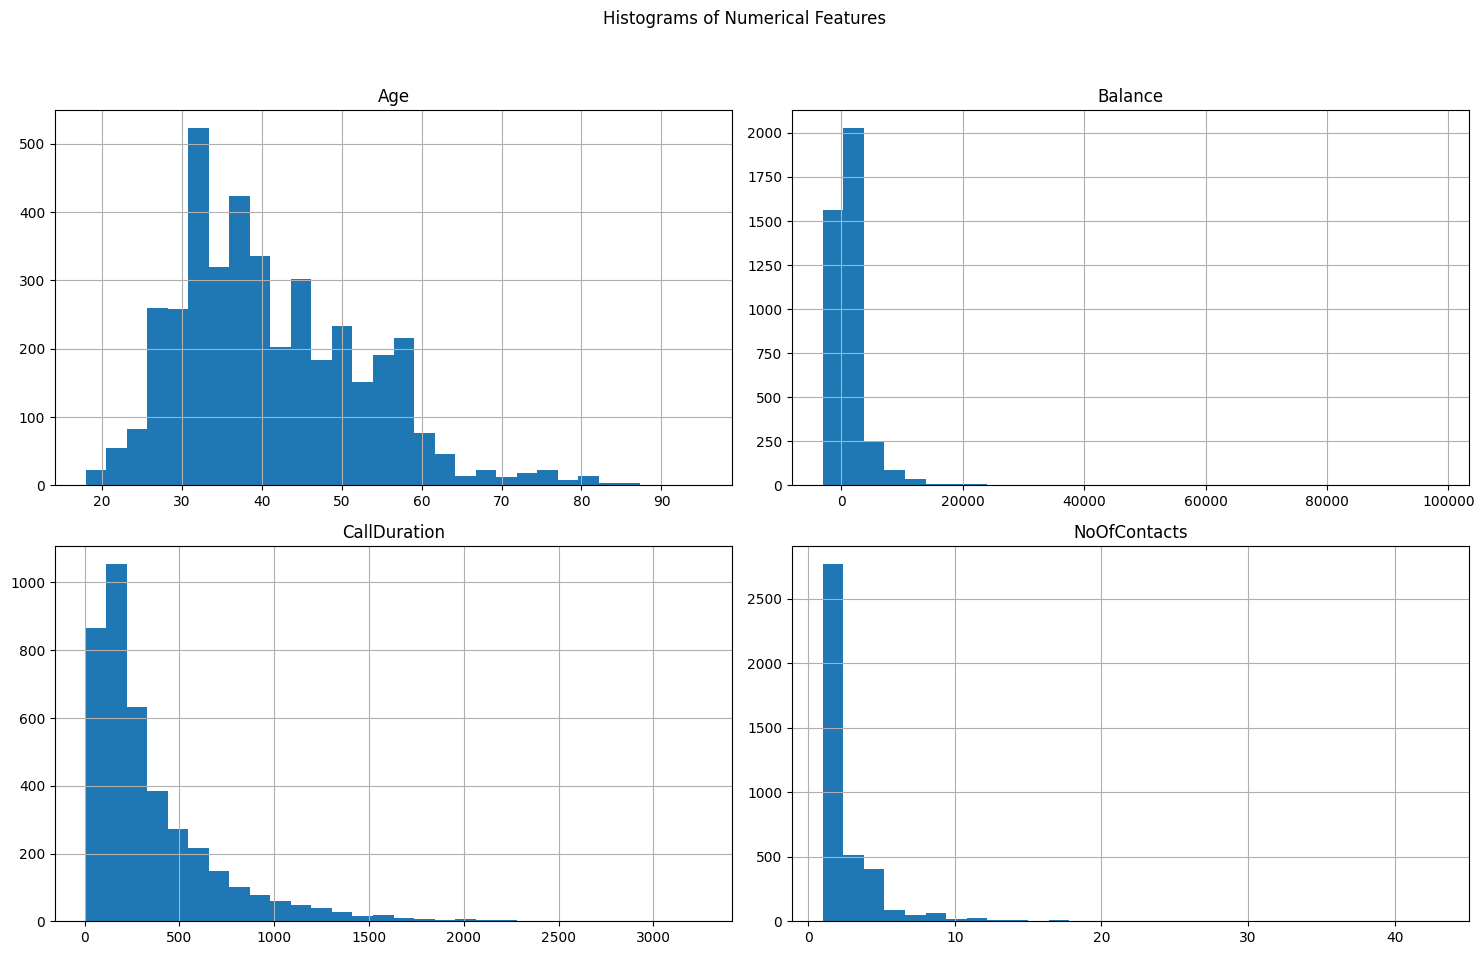

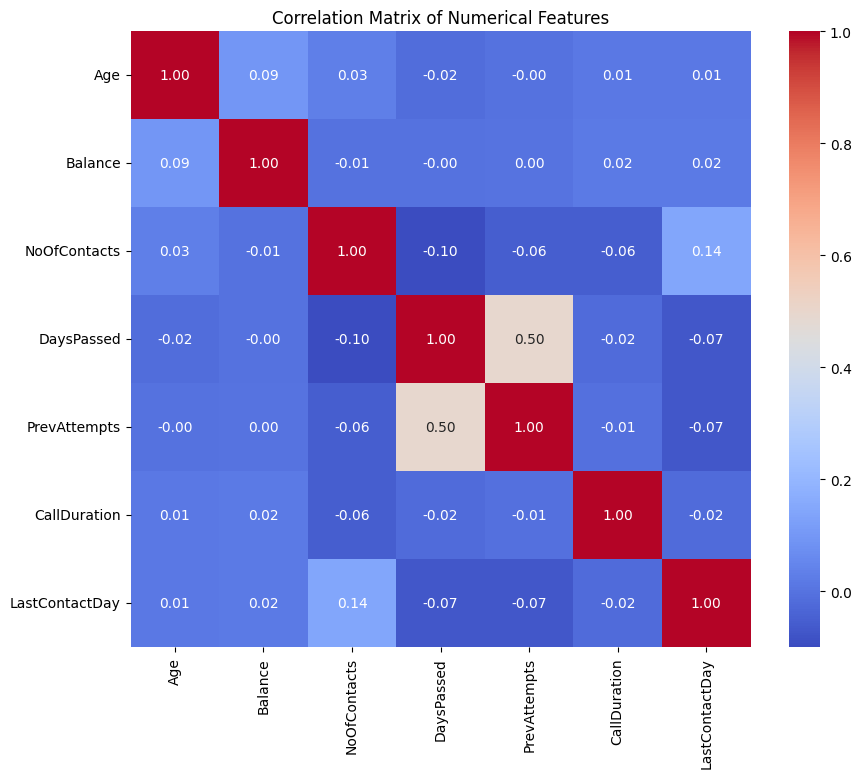

/tmp/ipython-input-5-2415985130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, y=col, ax=axes[i], order=X_train[col].value_counts().index, palette='viridis')
/tmp/ipython-input-5-2415985130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, y=col, ax=axes[i], order=X_train[col].value_counts().index, palette='viridis')
/tmp/ipython-input-5-2415985130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, y=col, ax=axes[i], order=X_train[col].value_counts().index, palette='viridis')
/tmp/ip

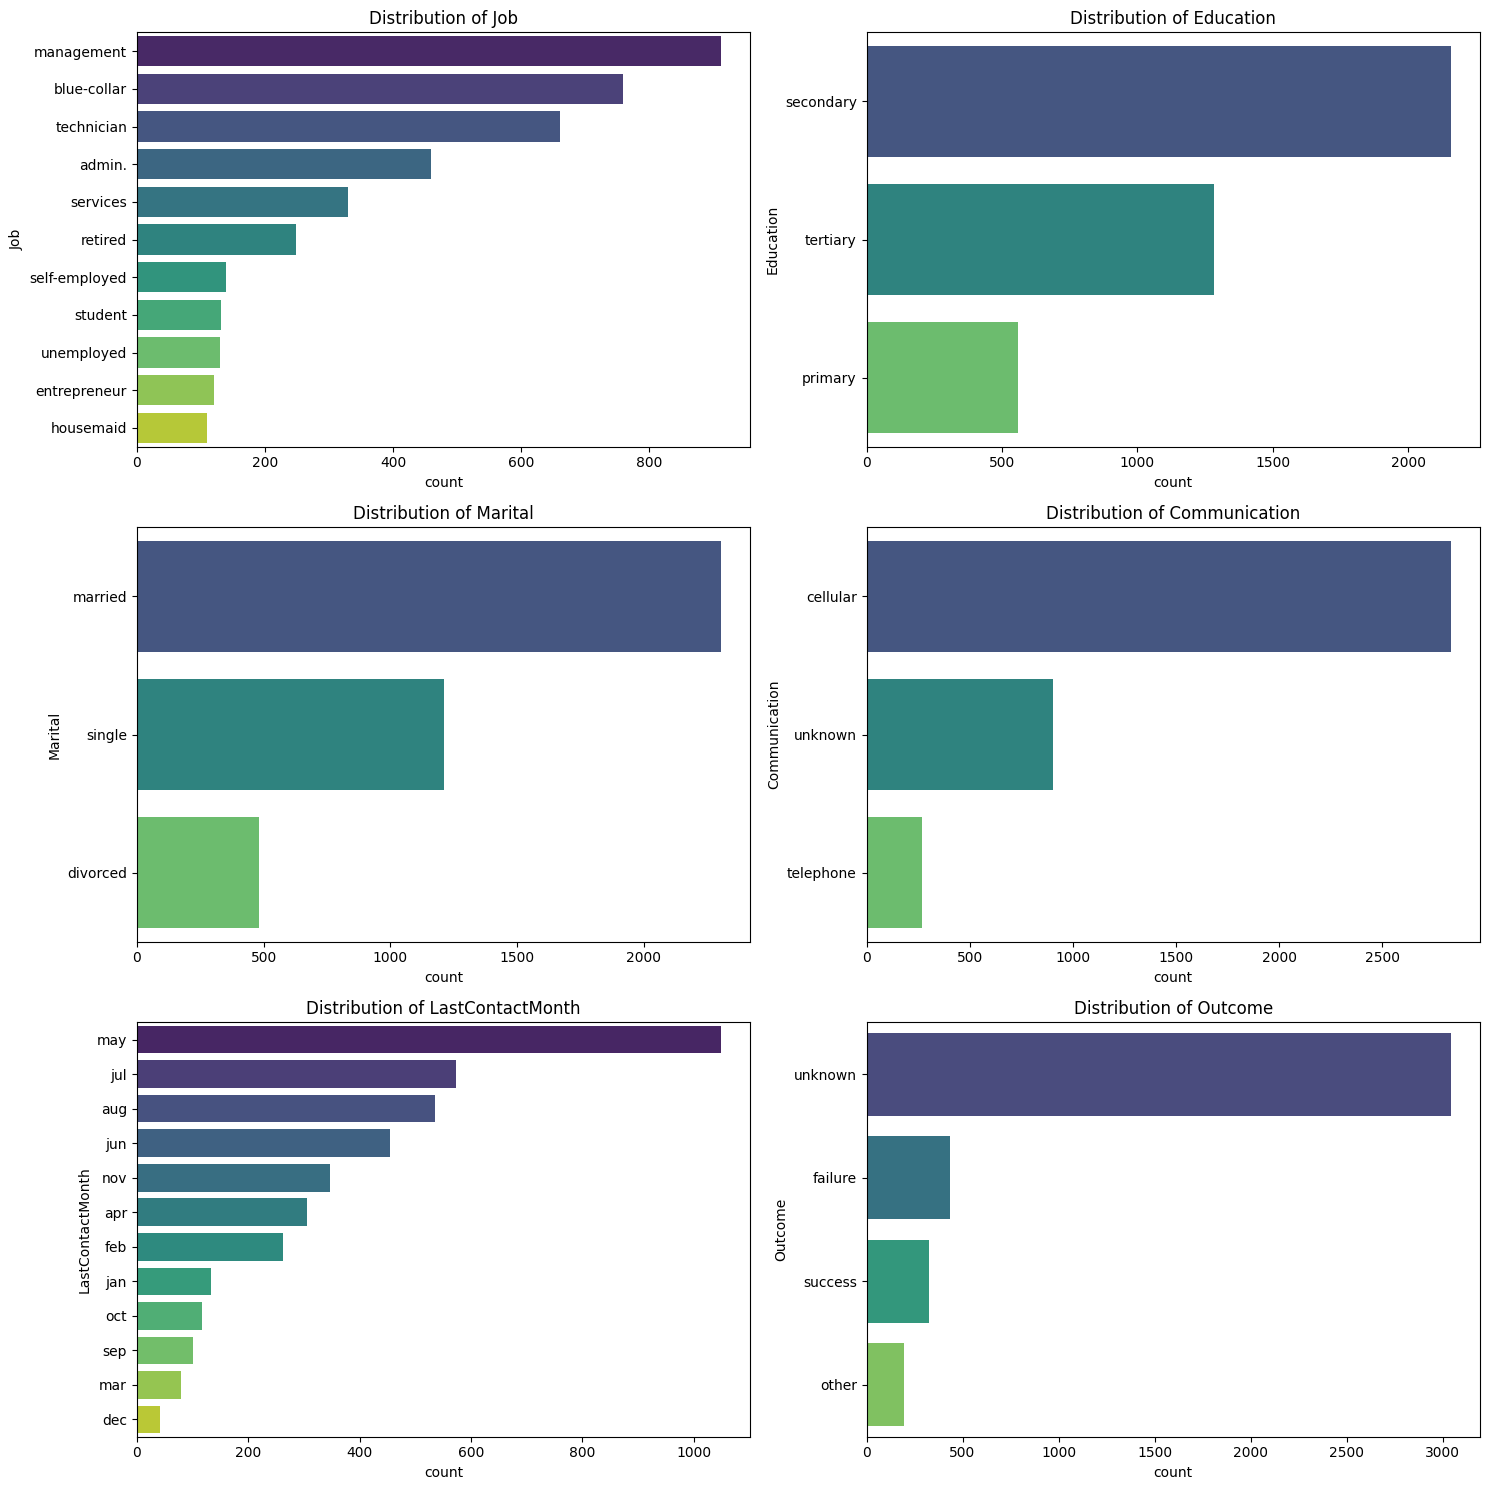

/tmp/ipython-input-5-2415985130.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='CarInsurance', palette='viridis')


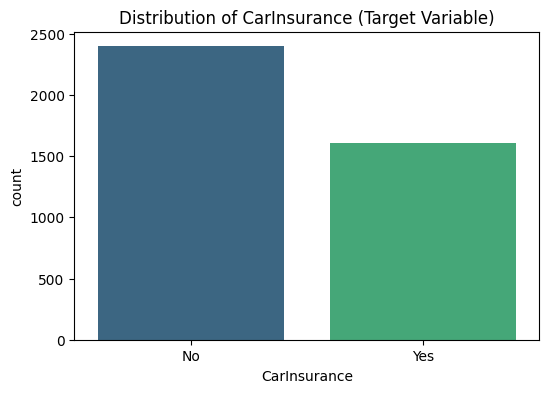

/tmp/ipython-input-5-2415985130.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='CarInsurance', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-5-2415985130.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='CarInsurance', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-5-2415985130.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='CarInsurance', y=col, ax=axes[i], palette='viridis')


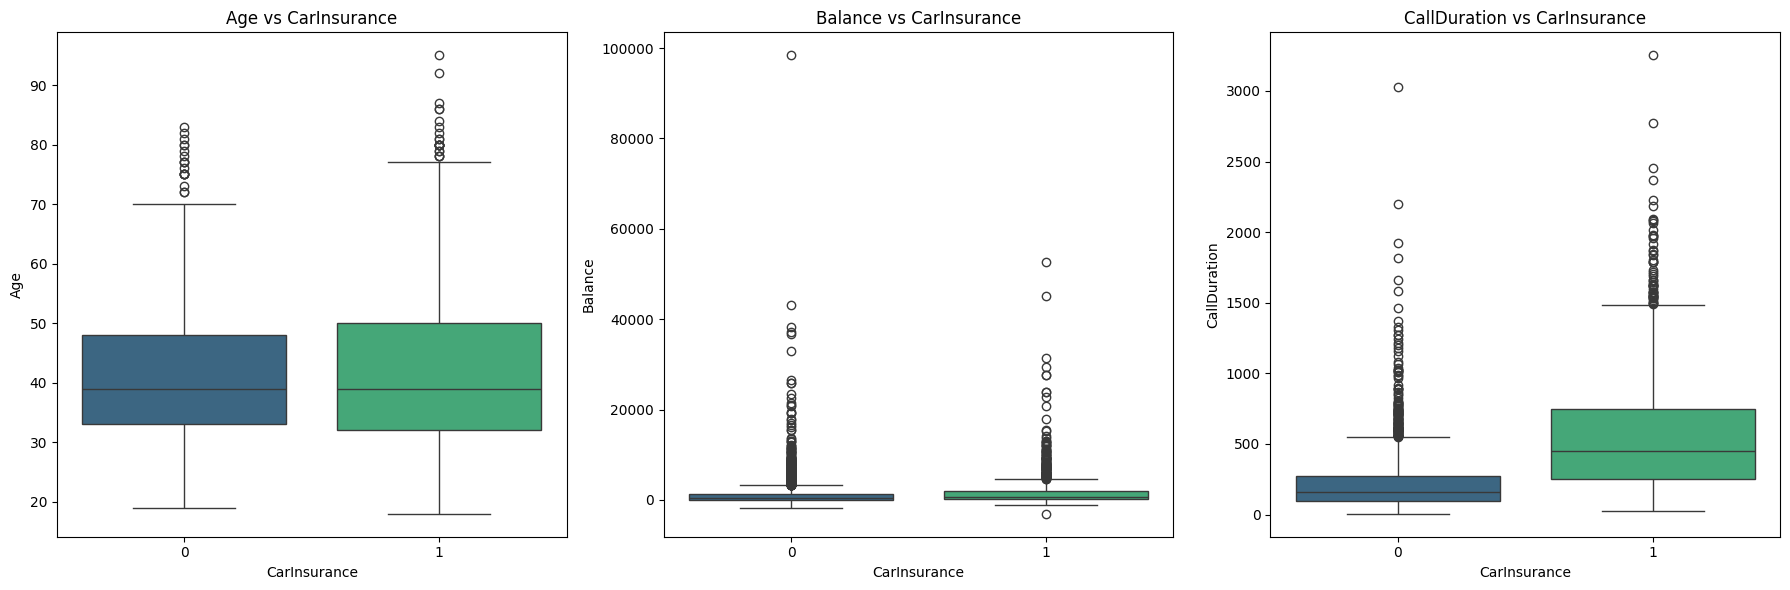

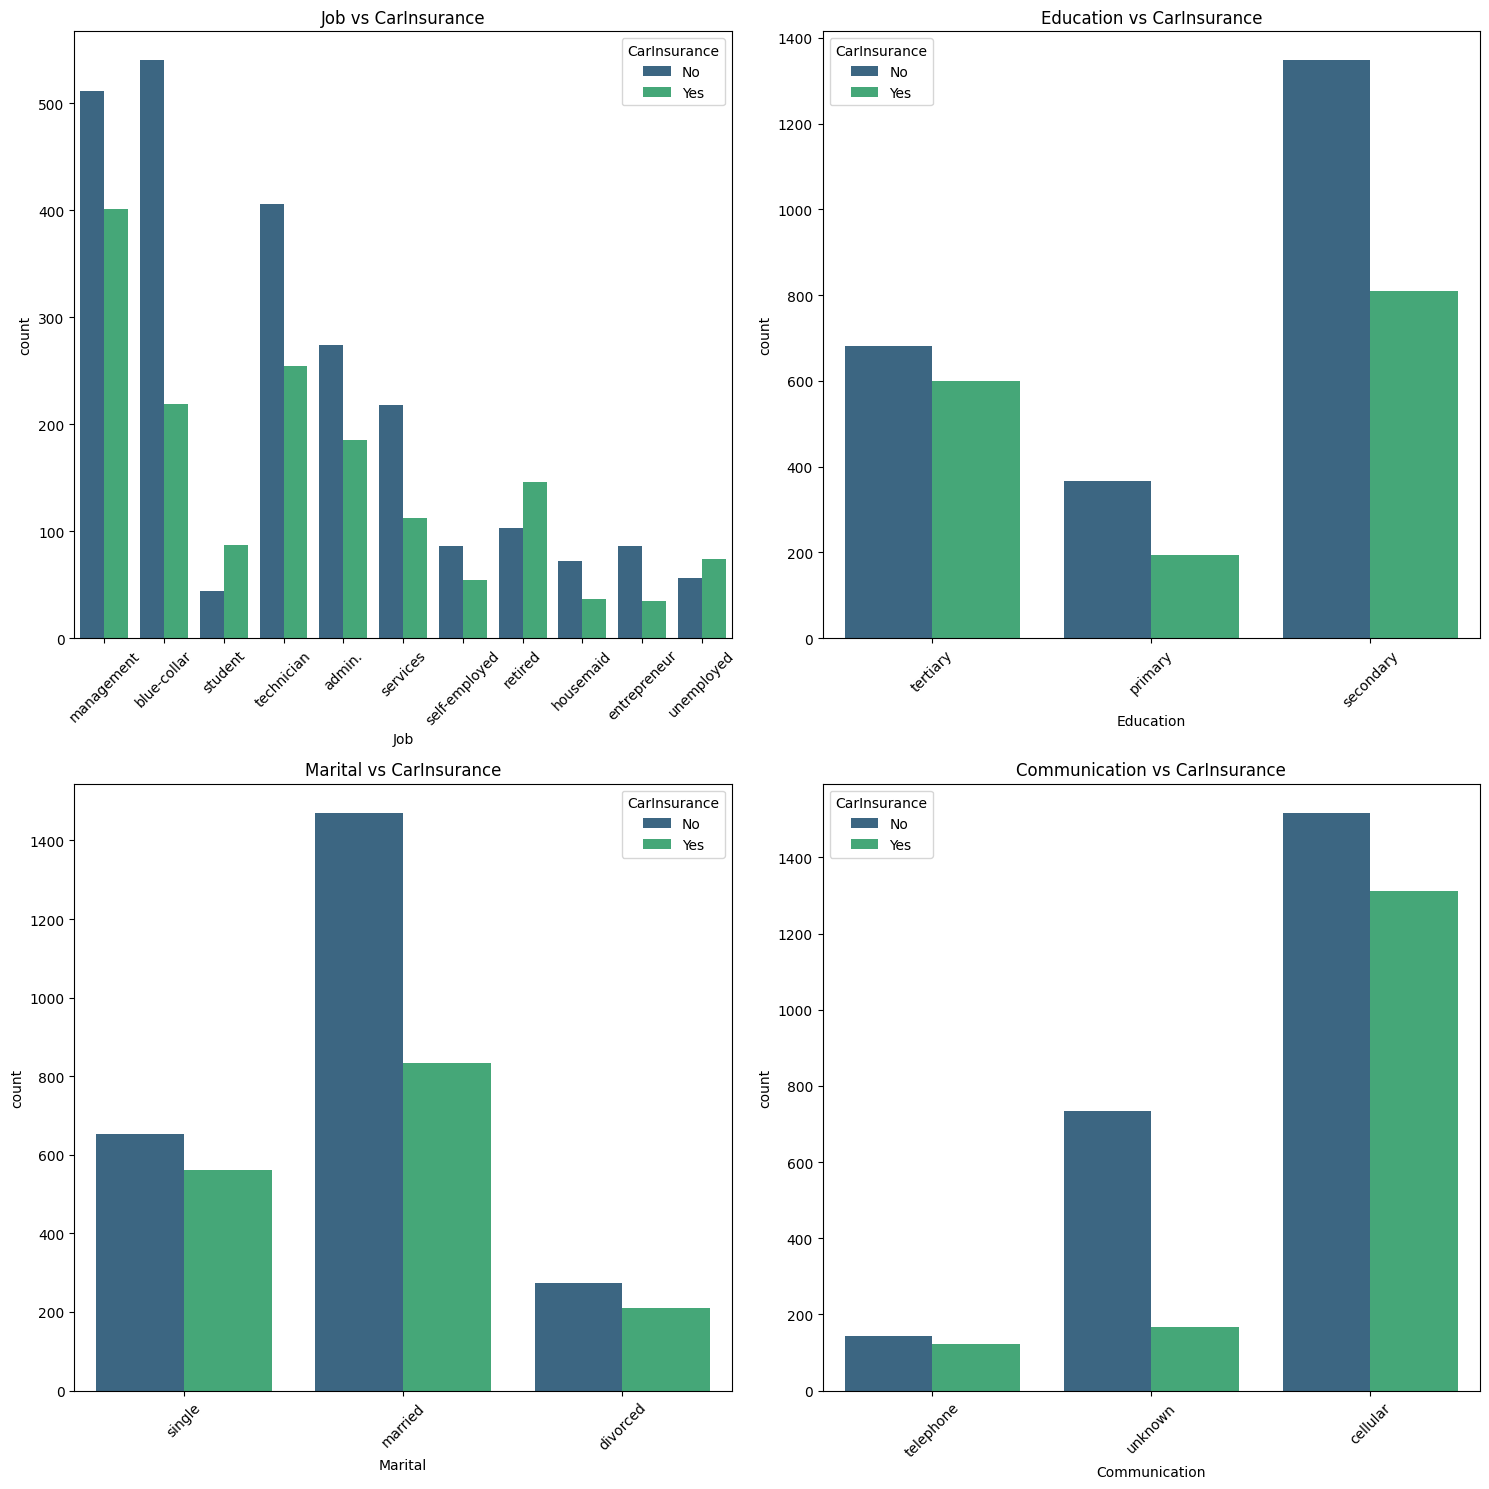

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical features
numerical_cols_to_plot = ['Age', 'Balance', 'CallDuration', 'NoOfContacts']
X_train[numerical_cols_to_plot].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(X_train[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Bar plots for categorical features
categorical_cols_to_plot = ['Job', 'Education', 'Marital', 'Communication', 'LastContactMonth', 'Outcome']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(categorical_cols_to_plot):
    sns.countplot(data=X_train, y=col, ax=axes[i], order=X_train[col].value_counts().index, palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 4. Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='CarInsurance', palette='viridis')
plt.title('Distribution of CarInsurance (Target Variable)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 5. Feature-target relationships
# Numerical vs Target (using Box Plots)
numerical_cols_for_target = ['Age', 'Balance', 'CallDuration']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i, col in enumerate(numerical_cols_for_target):
    sns.boxplot(data=train_df, x='CarInsurance', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs CarInsurance')
plt.tight_layout()
plt.show()

# Categorical vs Target (using Grouped Bar Plots)
categorical_cols_for_target = ['Job', 'Education', 'Marital', 'Communication']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(categorical_cols_for_target):
    sns.countplot(data=train_df, x=col, hue='CarInsurance', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs CarInsurance')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='CarInsurance', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Create new features based on existing ones, such as call duration and time-based features. Drop irrelevant columns.


**Reasoning**:
Create new features based on existing ones, handle the 'DaysPassed' column, and drop irrelevant columns to prepare the data for modeling.



In [ ]:
# Step 1: Ensure CallDuration is present. It was created in the preprocessing step.
# We can confirm its presence in the processed dataframes.
print("CallDuration in X_train_processed_df:", 'CallDuration' in X_train_processed_df.columns)
print("CallDuration in X_test_processed_df:", 'CallDuration' in X_test_processed_df.columns)

# Step 2: Extract 'day of week' and 'hour of day' features if CallStart is available.
# CallStart was dropped in the preprocessing step. Skipping this step as per instruction.

# Step 3: Create a binary feature for 'DaysPassed' indicating previous contact.
# This feature should be created before scaling, so let's add it to the original dataframes first
# Create the 'PreviouslyContacted' feature in the original train and test dataframes
train_df['PreviouslyContacted'] = (train_df['DaysPassed'] > 0).astype(int)
test_df['PreviouslyContacted'] = (test_df['DaysPassed'] > 0).astype(int)

# Now, re-apply the preprocessing pipeline to include the new feature and scale it
# Identify categorical and numerical columns, including the new feature
categorical_cols_updated = ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']
numerical_cols_updated = ['Age', 'Balance', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CallDuration', 'LastContactDay', 'PreviouslyContacted']

# Create transformers for numerical and categorical features
numerical_transformer_updated = StandardScaler()
categorical_transformer_updated = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor_updated = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_updated, numerical_cols_updated),
        ('cat', categorical_transformer_updated, categorical_cols_updated)])

# Apply preprocessing to the training data
X_train_updated = train_df.drop(['CarInsurance', 'Id'], axis=1)
y_train = train_df['CarInsurance']

# Fit and transform the training data with the updated preprocessor
X_train_processed_updated = preprocessor_updated.fit_transform(X_train_updated)

# Apply preprocessing to the testing data
X_test_updated = test_df.drop(['CarInsurance', 'Id'], axis=1)

# Transform the testing data with the updated preprocessor
X_test_processed_updated = preprocessor_updated.transform(X_test_updated)


# Convert processed arrays back to DataFrames for easier inspection
cat_feature_names_updated = preprocessor_updated.named_transformers_['cat'].get_feature_names_out(categorical_cols_updated)
all_feature_names_updated = numerical_cols_updated + list(cat_feature_names_updated)

X_train_processed_df = pd.DataFrame(X_train_processed_updated, columns=all_feature_names_updated)
X_test_processed_df = pd.DataFrame(X_test_processed_updated, columns=all_feature_names_updated)

# Step 4: Drop any original columns that are no longer needed.
# The original categorical and numerical columns used for creating the processed dataframes are implicitly handled by the ColumnTransformer.
# The 'Id' column was already dropped.

# Step 5: Confirm consistency in feature engineering.
print("\nTraining DataFrame Shape after feature engineering:", X_train_processed_df.shape)
print("Testing DataFrame Shape after feature engineering:", X_test_processed_df.shape)
print("\nTraining DataFrame Columns after feature engineering:")
display(X_train_processed_df.columns)
print("\nTesting DataFrame Columns after feature engineering:")
display(X_test_processed_df.columns)

CallDuration in X_train_processed_df: True
CallDuration in X_test_processed_df: True

Training DataFrame Shape after feature engineering: (4000, 44)
Testing DataFrame Shape after feature engineering: (1000, 44)

Training DataFrame Columns after feature engineering:


Index(['Age', 'Balance', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallDuration', 'LastContactDay', 'PreviouslyContacted', 'Job_admin.',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_cellular',
       'Communication_telephone', 'Communication_unknown',
       'LastContactMonth_apr', 'LastContactMonth_aug', 'LastContactMonth_dec',
       'LastContactMonth_feb', 'LastContactMonth_jan', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep',
       'Outcome_failure', 'Outcome_other', 'Outcome_success',
       'Outcome_unknown'],
      dtype='object')


Testing DataFrame Columns after feature engineering:


Index(['Age', 'Balance', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallDuration', 'LastContactDay', 'PreviouslyContacted', 'Job_admin.',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_cellular',
       'Communication_telephone', 'Communication_unknown',
       'LastContactMonth_apr', 'LastContactMonth_aug', 'LastContactMonth_dec',
       'LastContactMonth_feb', 'LastContactMonth_jan', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep',
       'Outcome_failure', 'Outcome_other', 'Outcome_success',
       'Outcome_unknown'],
      dtype='object')

## Modeling

### Subtask:
Split the training data, train various classification models (Logistic Regression, Random Forest, XGBoost), perform cross-validation and hyperparameter tuning. Evaluate the models using appropriate metrics (accuracy, precision, recall, F1, AUC).


**Reasoning**:
Split the data, initialize the models, define hyperparameter grids, perform hyperparameter tuning using GridSearchCV with cross-validation, get the best models, train the best models on the training split, evaluate the models on the validation split using various metrics, and print the evaluation results.



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Split the preprocessed training data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_processed_df, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 2. Initialize the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Suppress warning

# 3. Define hyperparameter grids
log_reg_grid = {'C': [0.01, 0.1, 1, 10, 100]}
rf_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None]}
xgb_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}

# 4. Perform hyperparameter tuning with GridSearchCV
models = {
    'Logistic Regression': (log_reg, log_reg_grid),
    'Random Forest': (rf_clf, rf_grid),
    'XGBoost': (xgb_clf, xgb_grid)
}

best_models = {}
for name, (model, param_grid) in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_split, y_train_split)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# 5. Train the best models on the entire training split
trained_best_models = {}
for name, model in best_models.items():
    print(f"Training best {name} on the training split...")
    model.fit(X_train_split, y_train_split)
    trained_best_models[name] = model

# 6. Evaluate each trained model on the validation split
evaluation_results = {}
for name, model in trained_best_models.items():
    print(f"Evaluating {name} on the validation split...")
    y_pred = model.predict(X_val_split)
    y_pred_proba = model.predict_proba(X_val_split)[:, 1]

    accuracy = accuracy_score(y_val_split, y_pred)
    precision = precision_score(y_val_split, y_pred)
    recall = recall_score(y_val_split, y_pred)
    f1 = f1_score(y_val_split, y_pred)
    roc_auc = roc_auc_score(y_val_split, y_pred_proba)

    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': roc_auc
    }

# 7. Print the evaluation metrics
print("\n--- Model Evaluation Results ---")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 1}
Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 300}
Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Training best Logistic Regression on the training split...
Training best Random Forest on the training split...
Training best XGBoost on the training split...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating Logistic Regression on the validation split...
Evaluating Random Forest on the validation split...
Evaluating XGBoost on the validation split...

--- Model Evaluation Results ---

Logistic Regression:
  Accuracy: 0.8200
  Precision: 0.8000
  Recall: 0.7352
  F1-score: 0.7662
  AUC: 0.8927

Random Forest:
  Accuracy: 0.8325
  Precision: 0.7931
  Recall: 0.7882
  F1-score: 0.7906
  AUC: 0.9137

XGBoost:
  Accuracy: 0.8413
  Precision: 0.8149
  Recall: 0.7819
  F1-score: 0.7981
  AUC: 0.9168


## Selection & explanation

### Subtask:
Select the best performing model and analyze feature importance.


**Reasoning**:
Identify the best model based on AUC and F1-score, extract feature importances or coefficients depending on the model type, and then visualize the top N features.



Best performing model based on AUC and F1-score: XGBoost

Feature importances for XGBoost:


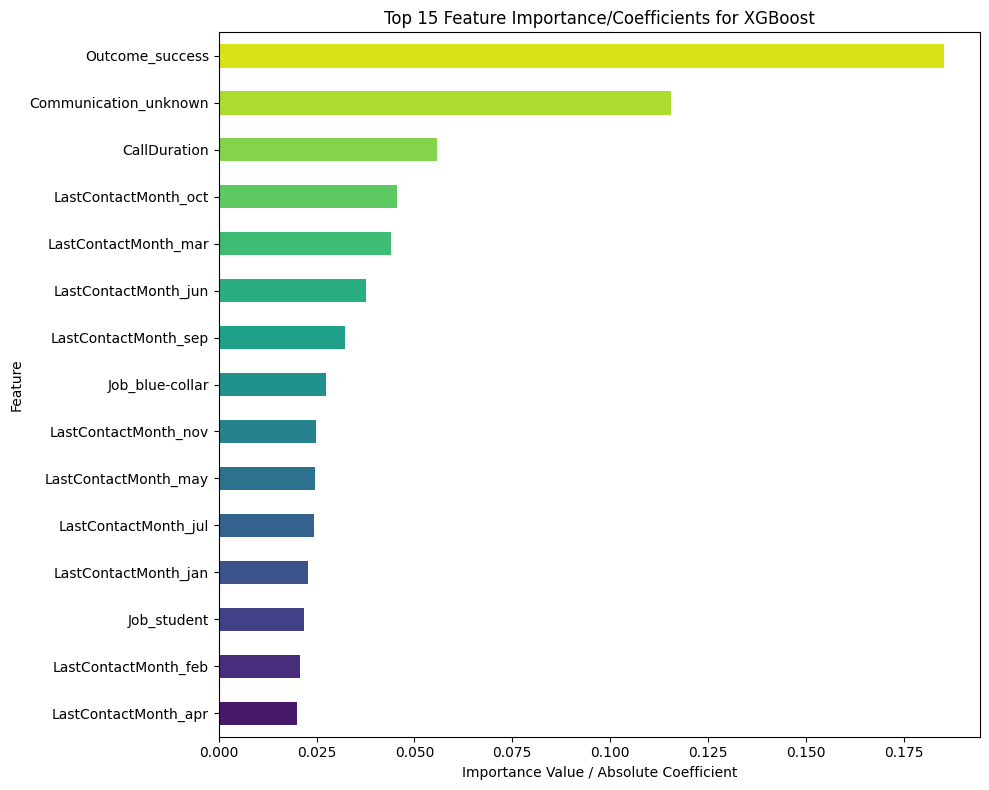


Interpretation of Top Features:
- Outcome_success: 0.1853
- Communication_unknown: 0.1155
- CallDuration: 0.0558
- LastContactMonth_oct: 0.0456
- LastContactMonth_mar: 0.0439
- LastContactMonth_jun: 0.0376
- LastContactMonth_sep: 0.0323
- Job_blue-collar: 0.0275
- LastContactMonth_nov: 0.0249
- LastContactMonth_may: 0.0246
- LastContactMonth_jul: 0.0244
- LastContactMonth_jan: 0.0228
- Job_student: 0.0217
- LastContactMonth_feb: 0.0206
- LastContactMonth_apr: 0.0199


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Identify the best model based on evaluation metrics (AUC and F1-score)
best_model_name = None
best_auc = -1
best_f1 = -1

for name, metrics in evaluation_results.items():
    if metrics['AUC'] > best_auc:
        best_auc = metrics['AUC']
        best_f1 = metrics['F1-score'] # Update F1 for the current best AUC
        best_model_name = name
    elif metrics['AUC'] == best_auc and metrics['F1-score'] > best_f1:
        best_f1 = metrics['F1-score']
        best_model_name = name

print(f"Best performing model based on AUC and F1-score: {best_model_name}")

# 2. Access the best performing model
best_model = trained_best_models[best_model_name]

# 3 & 4. Extract feature importance or coefficients
feature_names = X_train_processed_df.columns
feature_importances = None

if isinstance(best_model, (RandomForestClassifier, XGBClassifier)):
    # Tree-based models
    feature_importances = pd.Series(best_model.feature_importances_, index=feature_names)
    print(f"\nFeature importances for {best_model_name}:")
elif isinstance(best_model, LogisticRegression):
    # Logistic Regression
    # Use absolute values of coefficients for importance, as sign indicates direction
    feature_importances = pd.Series(np.abs(best_model.coef_[0]), index=feature_names)
    print(f"\nAbsolute coefficients for {best_model_name}:")
else:
    print(f"Feature importance not directly available for model type: {type(best_model)}")

# 5. Sort and visualize the top N features
if feature_importances is not None:
    n_top_features = 15 # Choose the number of top features to display
    top_features = feature_importances.sort_values(ascending=False).head(n_top_features)

    plt.figure(figsize=(10, 8))
    top_features.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('viridis', n_top_features))
    plt.title(f'Top {n_top_features} Feature Importance/Coefficients for {best_model_name}')
    plt.xlabel('Importance Value / Absolute Coefficient')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    # 6. Briefly interpret the top features
    print("\nInterpretation of Top Features:")
    for feature, importance in top_features.items():
        print(f"- {feature}: {importance:.4f}")

    if isinstance(best_model, LogisticRegression):
        # For Logistic Regression, also show the sign of the original coefficient
        original_coefs = pd.Series(best_model.coef_[0], index=feature_names)
        top_original_coefs = original_coefs.loc[top_features.index]
        print("\nOriginal coefficients for top features (Logistic Regression):")
        for feature, coef in top_original_coefs.items():
             print(f"- {feature}: {coef:.4f}")

## Test prediction

### Subtask:
Apply the same preprocessing steps to the test set, predict the `CarInsurance` outcome, and save the predictions in a CSV file with 'Id' and 'CarInsurance' columns.


**Reasoning**:
Apply the best model to the preprocessed test set to get predictions and save the results to a CSV file in the specified format.



In [ ]:
import pandas as pd

# 1. Access the best performing model (XGBoost)
best_model = trained_best_models[best_model_name]

# 2. Use the best model to predict the CarInsurance outcome on the preprocessed test data
test_predictions = best_model.predict(X_test_processed_df)

# 3. Create a new Pandas DataFrame containing the 'Id' column and the predicted 'CarInsurance' outcomes
# The 'Id' column is in the original test_df
predictions_df = pd.DataFrame({
    'Id': test_df['Id'],
    'CarInsurance': test_predictions
})

# 4. Save the resulting DataFrame to a CSV file named 'test_predictions.csv'
predictions_df.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to 'test_predictions.csv'")
display(predictions_df.head())

Test predictions saved to 'test_predictions.csv'


,Id,CarInsurance
0,4001,0
1,4002,0
2,4003,0
3,4004,1
4,4005,0


## Summary:

### Data Analysis Key Findings

*   The training data contained 4000 entries and the testing data contained 1000 entries, with a mix of numerical and categorical features.
*   Missing values were present in 'Job', 'Education', 'Communication', and 'Outcome' columns in both training and testing datasets. The 'CarInsurance' column in the test set was entirely missing, as expected.
*   Numerical features like 'Balance', 'NoOfContacts', 'DaysPassed', and 'PrevAttempts' showed large ranges or high maximum values, indicating potential outliers. 'DaysPassed' also contained a value of -1.
*   Preprocessing steps successfully handled missing values (using mode for 'Job'/'Education' and 'unknown' for 'Communication'/'Outcome'), calculated 'CallDuration' from 'CallStart' and 'CallEnd', mapped binary flags to numerical values, one-hot encoded categorical features, and scaled numerical features.
*   A new binary feature, 'PreviouslyContacted', was engineered from 'DaysPassed'.
*   After preprocessing and feature engineering, both the training and testing datasets had 44 features.
*   Exploratory Data Analysis revealed the distributions of various features and indicated class imbalance in the target variable 'CarInsurance'.
*   Feature-target analysis provided insights into how certain features like 'CallDuration', 'Outcome', and 'Communication' relate to the likelihood of purchasing car insurance.
*   Multiple classification models (Logistic Regression, Random Forest, XGBoost) were trained and evaluated.
*   Hyperparameter tuning using GridSearchCV identified optimal parameters for each model.
*   Based on AUC and F1-score, XGBoost was selected as the best-performing model.
*   Feature importance analysis for the XGBoost model highlighted 'Outcome\_success', 'Communication\_unknown', and 'CallDuration' as some of the most important features for prediction.
*   The final predictions for the 'CarInsurance' outcome on the test set were generated using the best-performing XGBoost model and saved to a CSV file.

### Insights or Next Steps

*   The class imbalance observed in the target variable should be addressed in future model training iterations, potentially using techniques like resampling (oversampling the minority class or undersampling the majority class) or using evaluation metrics more robust to imbalance, such as AUC and F1-score, which were already considered.
*   Further investigation into the potential outliers identified in features like 'Balance', 'NoOfContacts', 'DaysPassed', and 'PrevAttempts' could lead to improved model performance, either by removing or transforming these values.
